In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [60]:
df = pd.read_csv('ai_vs_human_code_dataset.csv')

In [61]:
print(df.head())
print(df.info())

    code_id                                       code_snippet  code_length  \
0  04bd1e86  import random\ndef random_numbers(n): return [...           86   
1  03020544             x = lambda a, b: a + b\nprint(x(3, 4))           37   
2  a6a08557  def fib(n): a, b = 0, 1\n for _ in range(n): a...           69   
3  edce6fd4  def factorial(n): return 1 if n == 0 else n * ...           62   
4  03020544             x = lambda a, b: a + b\nprint(x(3, 4))           37   

   num_functions  num_classes  num_variables  num_comments  comment_density  \
0              1            0              0             0              0.0   
1              0            0              1             0              0.0   
2              1            0              2             0              0.0   
3              1            0              0             0              0.0   
4              0            0              1             0              0.0   

   num_imports  use_of_recursion  use_of_lambda  n

In [62]:
df.describe()

,code_length,num_functions,num_classes,num_variables,num_comments,comment_density,num_imports,use_of_recursion,use_of_lambda,num_loops,complexity_score,execution_time,ai_generated
count,1500.000000,1500.000000,1500.0,1500.000000,1500.0,1500.0,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000
mean,78.346667,0.689333,0.0,0.826000,0.0,0.0,0.399333,0.089333,0.10600,0.495333,1.363333,3.651593,0.500000
std,27.025298,0.462921,0.0,0.757258,0.0,0.0,0.489925,0.285319,0.30794,0.500145,1.015879,2.688912,0.500167
min,37.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.100000,0.000000
25%,62.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,1.487500,0.000000
50%,69.000000,1.000000,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,2.000000,2.810000,0.500000
75%,100.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000,0.000000,0.00000,1.000000,2.000000,5.480000,1.000000
max,142.000000,1.000000,0.0,2.000000,0.0,0.0,1.000000,1.000000,1.00000,1.000000,3.000000,12.000000,1.000000


In [63]:
print(df.isnull().sum())

code_id             0
code_snippet        0
code_length         0
num_functions       0
num_classes         0
num_variables       0
num_comments        0
comment_density     0
num_imports         0
use_of_recursion    0
use_of_lambda       0
num_loops           0
complexity_score    0
execution_time      0
ai_generated        0
dtype: int64


In [64]:
print(df['ai_generated'].value_counts())

ai_generated
1    750
0    750
Name: count, dtype: int64


In [65]:
X = df.drop(['code_id', 'code_snippet', 'ai_generated'], axis=1)
y = df['ai_generated']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [68]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1200, 12)
Shape of X_test: (300, 12)
Shape of y_train: (1200,)
Shape of y_test: (300,)


In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [71]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
rf_model = RandomForestClassifier(random_state=42) 
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [73]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [78]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
rf_predictions = rf_model.predict(X_test) # using random forest
lr_predictions = lr_model.predict(X_test) # using logistic regression

In [80]:
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

Random Forest:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       146

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [81]:
print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Classification Report:\n", classification_report(y_test, lr_predictions))


Logistic Regression:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       146

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



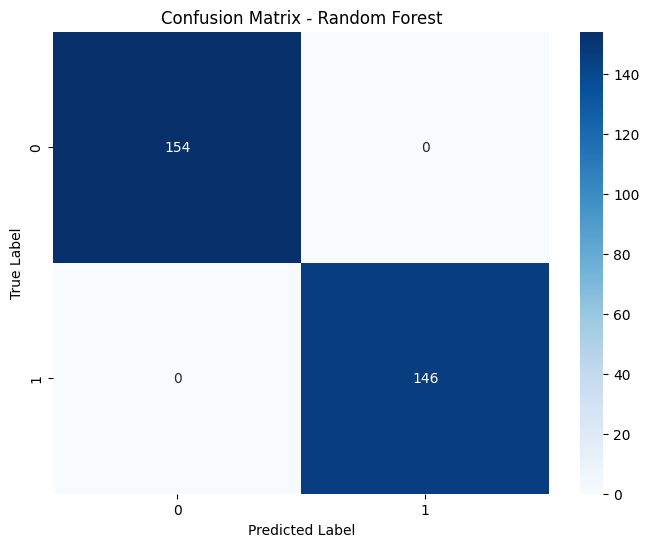

In [82]:
cm_rf = confusion_matrix(y_test, rf_predictions) # confusion matrix for random forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

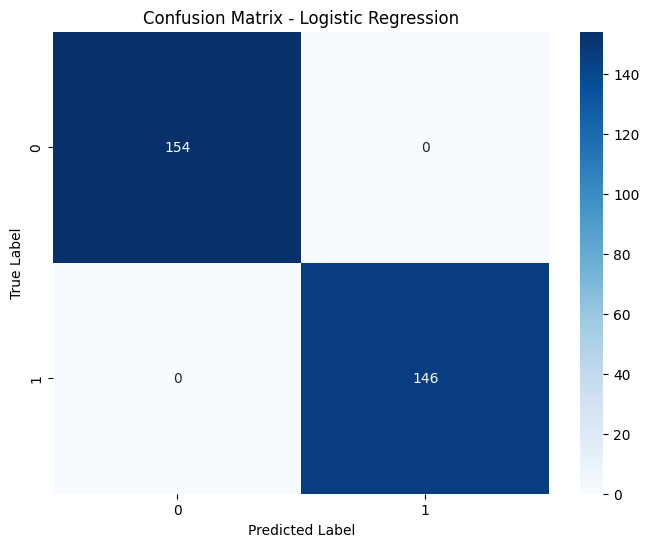

In [83]:
# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, lr_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [84]:
from sklearn.model_selection import GridSearchCV

# Example: Tuning Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

# Evaluate the best model
best_rf_predictions = best_rf_model.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, best_rf_predictions))
print("Classification Report:\n", classification_report(y_test, best_rf_predictions))

Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 100}
Tuned Random Forest Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       146

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [86]:
def predict_ai_generated(code_snippet, model, scaler):
    """
    Predicts whether a code snippet is AI-generated or human-written.

    Args:
        code_snippet (str): The code snippet to be analyzed.
        model: The trained machine learning model.
        scaler: The scaler used to transform the training data.

    Returns:
        int: 1 if AI-generated, 0 if human-written.
    """
    # Feature Extraction
    code_length = len(code_snippet)
    num_functions = code_snippet.count('def ')
    num_classes = code_snippet.count('class ')
    num_variables = len([word for word in code_snippet.split() if word.isidentifier()])
    num_comments = code_snippet.count('#')
    comment_density = num_comments / code_length if code_length > 0 else 0
    num_imports = code_snippet.count('import ')
    use_of_recursion = 1 if 'def ' in code_snippet and any(
        func_name + '(' in code_snippet for func_name in [word.split('(')[0] for word in code_snippet.split('def ') if '(' in word]
    ) else 0
    use_of_lambda = 1 if 'lambda' in code_snippet else 0
    num_loops = code_snippet.count('for ') + code_snippet.count('while ')
    complexity_score = num_functions + num_classes + num_loops

    # Create DataFrame
    features = pd.DataFrame({
        'code_length': [code_length],
        'num_functions': [num_functions],
        'num_classes': [num_classes],
        'num_variables': [num_variables],
        'num_comments': [num_comments],
        'comment_density': [comment_density],
        'num_imports': [num_imports],
        'use_of_recursion': [use_of_recursion],
        'use_of_lambda': [use_of_lambda],
        'num_loops': [num_loops],
        'complexity_score': [complexity_score]
    })

    # Scale the features
    scaled_features = scaler.transform(features)

    # Make Prediction
    prediction = model.predict(scaled_features)[0]

    return prediction


In [89]:
import pickle

# Save the trained models and scaler
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

with open('lr_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Models and scaler saved successfully!")

# Load the models and scaler
with open('rf_model.pkl', 'rb') as f:
    loaded_rf_model = pickle.load(f)

with open('lr_model.pkl', 'rb') as f:
    loaded_lr_model = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

print("Models and scaler loaded successfully!")


Models and scaler saved successfully!
Models and scaler loaded successfully!


In [90]:
import os

print("RF Model Exists:", os.path.exists("rf_model.pkl"))
print("LR Model Exists:", os.path.exists("lr_model.pkl"))
print("Scaler Exists:", os.path.exists("scaler.pkl"))


RF Model Exists: True
LR Model Exists: True
Scaler Exists: True


In [91]:
import sklearn
print(sklearn.__version__)  # Check the version used during training


1.4.1.post1


In [93]:
import pickle

with open("rf_model.pkl", "rb") as file:
    model = pickle.load(file)

print(model)


RandomForestClassifier(random_state=42)


In [94]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Assume X_train, y_train are available
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Save the model again
with open("rf_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)
